<a href="https://colab.research.google.com/github/Park-Youngjeung/Park-Youngjeung.github.io/blob/master/FinanceDataReader_%EC%97%AC%EB%9F%AC_%EC%A2%85%EB%AA%A9%EC%9D%98_%EA%B0%80%EA%B2%A9%EC%9D%84_%ED%95%9C%EB%B2%88%EC%97%90_%EA%B0%80%EC%A0%B8%EC%98%A4%EA%B8%B0%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FinanceDataReader 여러 종목의 가격을 한번에 가져오기

* 종목별로 따로 가져와 리스트로 만들고
* pd.concat()로 합쳐 하나의 DataFrame 으로 만들 수 있습니다

In [4]:
#working directory : /home/stock

# reference site :
# https://github.com/FinanceData/FinanceDataReader/wiki/Users-Guide?fbclid=IwAR2NI6fxeaM-8182lkeJv80O2CZHU3hjGt2So-zbq3V2De_mtf5NuNtv8Ck

# FinanceDataReader 설치 (런타임 유형: Python 3)

! pip install finance-datareader

In [5]:
import FinanceDataReader as fdr
fdr.__version__

'0.7.1'

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (16,8)

# 한 종목의 가격 가져오기

In [7]:
import FinanceDataReader as fdr

# KB Finance(105560)
df = fdr.DataReader('105560', '2017-01-01', '2017-12-31')
df.head(15)

,Date,Open,High,Low,Close,Volume,Change
Date,,,,,,,
2017-01-02,2017-01-02,42800,43050,42250,42600,345769,-0.004673
2017-01-03,2017-01-03,42600,43750,42000,43700,956685,0.025822
2017-01-04,2017-01-04,43900,44400,43450,44150,831295,0.010297
2017-01-05,2017-01-05,44200,44200,42550,42800,1128957,-0.030578
2017-01-06,2017-01-06,43000,43000,42300,42650,1338299,-0.003505
2017-01-09,2017-01-09,42650,42700,42150,42400,795293,-0.005862
2017-01-10,2017-01-10,43000,43400,42650,43250,1093427,0.020047
2017-01-11,2017-01-11,42700,43700,42700,43350,912080,0.002312
2017-01-12,2017-01-12,43600,44100,43350,44100,1011997,0.017301


# 여러 종목의 종가(Close) 가져오기
* ticker 리스트의 종가(Close) 가져와 리스트로 만들기
* pd.concat()로 합치기

In [0]:
df_krx = fdr.StockListing('KRX')
tiker_list = list(df_krx.Symbol)

In [15]:
import os
os.chdir("..")
os.chdir("home")
os.getcwd()



'/home'

In [48]:
df_krx.head()

,Symbol,Name,Sector,Industry
0,001040,CJ,기타 금융업,지주회사
1,011150,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입"
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"


In [49]:
# ticker 리스트의 종가(Close) 가져와 리스트로 만들기

import pandas as pd


df_list_volume = [fdr.DataReader(ticker, '2000-01-01', '2018-12-28')['Volume'] for ticker in tiker_list]

len(df_list_volume)

2264

In [0]:
df_krx_name_code_list = []
for i in range(len(df_krx)):
    name_and_code= df_krx.iloc[i].Name + '(' + df_krx.iloc[i].Symbol + ')'
    df_krx_name_code_list.append(name_and_code)

In [2]:
# pd.concat()로 합치기
import pandas as pd
df_stock_data_volume=pd.concat(df_list_volume, axis=1)
df_stock_data_volume.columns = df_krx_name_code_list
#df_stock_data = df_stock_data.dropna()
df_stock_data_volume.head()

NameError: ignored

In [44]:
df_stock_data.tail()

,CJ(001040),CJ씨푸드(011150),HSD엔진(082740),KG케미칼(001390),OCI(010060),SH에너지화학(002360),SK네트웍스(001740),SK케미칼(285130),STX(011810),WISCOM(024070),...,엔케이맥스(262760),엘피케이(183350),인프라웨어테크놀러지(247300),제이에스피브이(250300),지앤이헬스케어(299480),툴젠(199800),티씨엠생명과학(228180),틸론(217880),파인이엠텍(278990),판도라티비(202960)
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-21,128715.0,2405.0,5370.0,17500.0,110500.0,1135.0,4910.0,72100.0,11500.0,2785.0,...,7550.0,2690.0,846.0,1435.0,3100.0,87500.0,19500.0,5500.0,4100.0,1240.0
2018-12-24,126357.0,2355.0,5300.0,17550.0,111000.0,1110.0,5000.0,71300.0,11250.0,2765.0,...,7500.0,2760.0,756.0,1435.0,2925.0,87700.0,20000.0,6290.0,4100.0,1240.0
2018-12-26,124000.0,2265.0,5250.0,17300.0,103500.0,1075.0,4990.0,70500.0,11250.0,2790.0,...,7890.0,2900.0,670.0,1435.0,2925.0,85200.0,20450.0,7230.0,4100.0,1100.0
2018-12-27,120500.0,2270.0,5200.0,17600.0,104500.0,1095.0,5270.0,69800.0,11350.0,2805.0,...,7400.0,2900.0,603.0,1435.0,2925.0,94700.0,19050.0,7080.0,4100.0,1205.0
2018-12-28,121500.0,2320.0,5280.0,17400.0,107000.0,1100.0,5200.0,70000.0,11750.0,2750.0,...,7380.0,2900.0,580.0,1435.0,2925.0,100000.0,20050.0,6900.0,4100.0,1200.0


In [0]:
df_stock_data_volume.to_csv('2000-2018_stock_data_volume.csv')
# df_krx.to_csv('krx_company_list_20181228.csv')

In [46]:
os.listdir()

['krx_company_list_20181228.csv', '2000-2018_stock_data.csv']

# 개별 종목의 2017년 수익률 비교


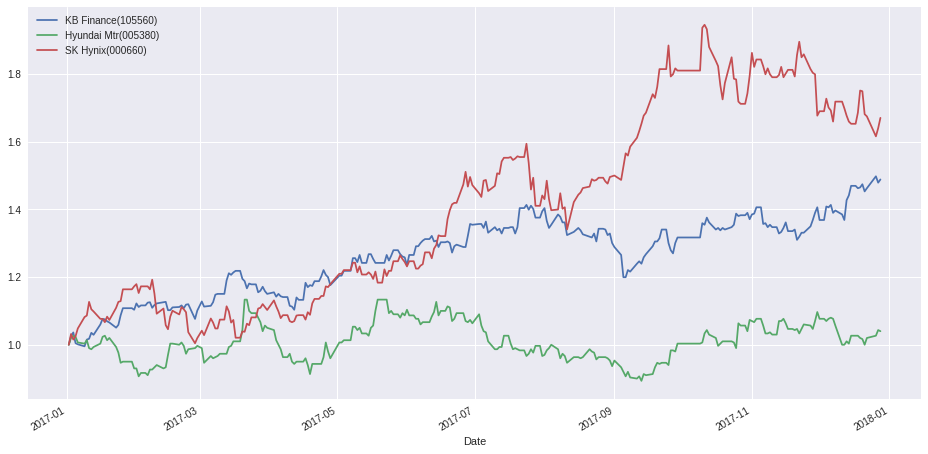

In [0]:
# 정규화: 가격의 시작을 1.0 으로

df_norm = df / df.iloc[0]
df_norm.plot()

### 2018 FianceData.KR http://fb.com/fiancedata